# 1. 문제정의 


  ## 1.1 경진대회 소개

- 물류 유통량 예측 경진 대회 (회귀모델)

- 제주시 내 택배 운송 데이터를 이용하여 운송량 예측 AI 개발

- https://dacon.io/competitions/official/235867/overview/description

- 주최 : 국토연구원
- 주관 : 데이콘 
    ### 1.1.1 평가
  - 평가산식 : RMSE
  - Public 평가 : 테스트 데이터 중 랜덤 샘플 된 50%로 채점
  - Private 평가 : 나머지 50 % 테스트 데이터로 채점

    ### 1.1.2 배경
    - 코로나 19는 경제, 사회 분야의 구조적 변화를 촉발하여 비대면화와 디지털 전환을 가속화 시키고 있으며, 
    비대면 거래의 증가에 따라 2020년 택배 물량은 약 30억 건으로 전년 대비 21% 급증하였습니다.

    - 이에 따라 택배 운송량을 예측하여 비대면 경제의 발전을 예측하기 위한 경진대회를 개최합니다(사례지역:제주도).
    더욱 효율적인 물류 유통을 위해 택배 운송량을 예측해주세요! 

    ### 1.1.3 데이터 분석 대상
    - train : 총 26,457행의 데이터 20열
    - test : 총 10,000행의 데이터 19열("credit" 제외)

    => train 데이터를 이용해 모델을 학습 시킨 뒤 test 데이터를 활용해 **"INVC_CONT "** 예측

    

## 1.2 데이터 도메인 정보
- index : 인덱스
- SEND_SPG_INNB : 송하인_격자공간고유번호
- REC_SPG_INNB : 수하인 격자공간고유번호
- DL_GD_LCLS_NM : 카테고리_대
- DL_GD_MCLS_NM : 카테고리_중
- INVC_CONT : 운송장 건 수

## 1.3 평가척도
=> 참가자가 최종적으로 제출한 결과물의 우열을 판단하는 척도

- 본 대회에서는 RMSE라는 평가척도를 적용합니다. 이 RMSE 값은 회귀모델에서 평가지표로 사용하는 지표 중 하나이다.

## 1.4 문제 해결을 위한 접근 방식


- **EDA -> 전처리 -> 데이터 모델링 -> 결과 확인 ->모델링 성능 개선**

## 1.5 섹션 아이디어


# 2. 데이터 간단히 탐색

In [1]:
# 버젼 설정
today = "1227"

## 2.2 데이터 로드


### 2.2.1 학습 데이터

In [32]:
import pandas as pd

In [51]:
# 학습 데이터 로드
X = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/train_df.csv", encoding = "cp949")

In [52]:
# 학습 데이터 기본 정보 파악
display(X.info())

display(X.head().T)

display(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


None

,0,1,2,3,4
index,0,1,2,3,4
SEND_SPG_INNB,1129000014045300,1135000009051200,1135000030093100,1154500002014200,1165000021008300
REC_SPG_INNB,5011000220046300,5011000178037300,5011000265091400,5011000315087400,5011000177051200
DL_GD_LCLS_NM,패션의류,생활/건강,패션의류,식품,식품
DL_GD_MCLS_NM,상의,반려동물,기타패션의류,농산물,가공식품
INVC_CONT,3,3,9,10,3


,index,SEND_SPG_INNB,REC_SPG_INNB,INVC_CONT
count,32000.000000,3.200000e+04,3.200000e+04,32000.000000
mean,15999.500000,4.729981e+15,3.713145e+15,4.767875
std,9237.748643,7.387137e+14,1.320619e+15,5.752122
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7999.750000,5.011000e+15,2.820000e+15,3.000000
50%,15999.500000,5.011000e+15,4.146500e+15,3.000000
75%,23999.250000,5.013001e+15,4.812350e+15,5.000000
max,31999.000000,5.013001e+15,5.013001e+15,239.000000


- 송하인 격자고유번호 별로 확인?
- 수하인 격자고유번호 별로 확인

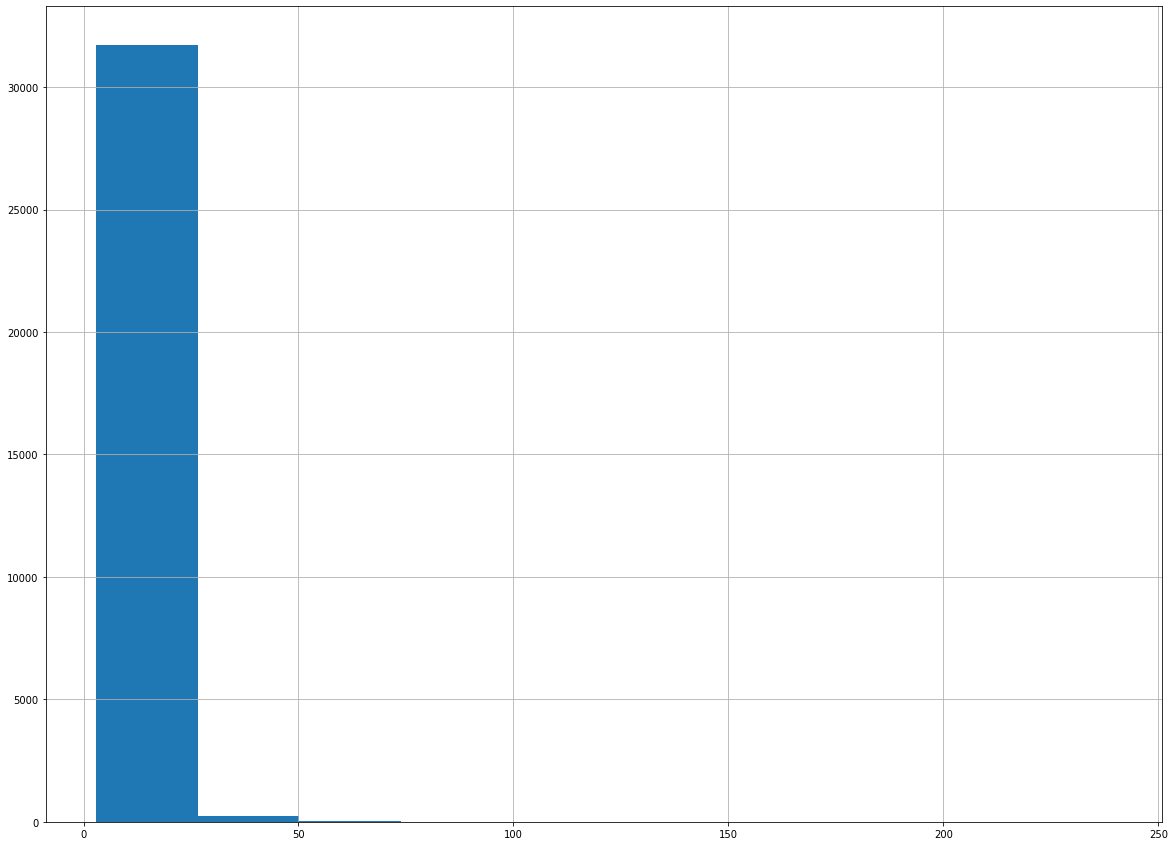

In [55]:
# 이상치 좀 더 확인
X["INVC_CONT"].hist(figsize = (20,15))

- 이상치는 없을 것이라 판단

In [57]:
#결측값 추출
display(pd.DataFrame(X.isnull().sum()).T)

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,0,0,0,0,0


- 결측값이 없다.

In [58]:
# 중복데이터 확인
temp = X.drop("index",axis = 1)
print(temp.duplicated().sum()) # 1634개의 열 중복

display(temp[temp.duplicated()])


0


,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT


- 중복데이터가 없다.

### 2.2.2 테스트 데이터

In [53]:
# 테스트 데이터 로드
test = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/test_df.csv", encoding = "cp949")

In [59]:
# 테스트 데이터 기본 정보 파악
display(test.info())

display(test.head())

display(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          4640 non-null   int64 
 1   SEND_SPG_INNB  4640 non-null   int64 
 2   REC_SPG_INNB   4640 non-null   int64 
 3   DL_GD_LCLS_NM  4640 non-null   object
 4   DL_GD_MCLS_NM  4640 non-null   object
dtypes: int64(3), object(2)
memory usage: 181.4+ KB


None

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM
0,32000,5013000043028400,1165000021097200,식품,농산물
1,32001,5013000044016100,1154500002066400,식품,농산물
2,32002,5013000205030200,4139000102013200,식품,농산물
3,32003,5013000205030200,4221000040093400,식품,농산물
4,32004,5013000268011400,2726000004017100,식품,농산물


,index,SEND_SPG_INNB,REC_SPG_INNB
count,4640.000000,4.640000e+03,4.640000e+03
mean,34319.500000,4.742077e+15,3.715801e+15
std,1339.596954,7.226586e+14,1.322435e+15
min,32000.000000,1.111000e+15,1.111000e+15
25%,33159.750000,5.011000e+15,2.820000e+15
50%,34319.500000,5.011000e+15,4.146500e+15
75%,35479.250000,5.013001e+15,4.812150e+15
max,36639.000000,5.013001e+15,5.013001e+15


In [60]:
# 중복 데이터.
display(test.drop("index",axis = 1).duplicated().sum()) # 352개 존재

0

### 2.2.3 제출 데이터

In [61]:
# 테스트 데이터 로드
sub = pd.read_csv("/content/drive/Shareddrives/A-2/data/물류/sample_submission.csv", encoding = "cp949")

In [62]:
# 테스트 데이터 기본 정보 파악
display(sub.info())

display(sub.head())

display(sub.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   index      4640 non-null   int64
 1   INVC_CONT  4640 non-null   int64
dtypes: int64(2)
memory usage: 72.6 KB


None

,index,INVC_CONT
0,32000,0
1,32001,0
2,32002,0
3,32003,0
4,32004,0


,index,INVC_CONT
count,4640.000000,4640.0
mean,34319.500000,0.0
std,1339.596954,0.0
min,32000.000000,0.0
25%,33159.750000,0.0
50%,34319.500000,0.0
75%,35479.250000,0.0
max,36639.000000,0.0


## 2.3 섹션 아이디어

- [11.30]
  - 1) sub 3가지 유형 별 예측확률 필요 모델 학습 후 predict_proba 필요
  - 2) train, test 모두 occyp_type(직업열)에 결측값 존재 -> 직업 정의를 내릴수  없는 직업들일 경우라 생각 -> "Etc" 값으로 대치
  - 3) index값은 키 값 -> 학습에서 제외 가능 
  - 4) 범주형 데이터를 가진 열이 많다. -> 라벨 인코딩, 원-핫 인코딩 필요
  - 5) 정규화 -> "RandomForest"에서는 필요 없다. -> 우선 랜포로 진행

- [12.01]
  - 1) 음수로 나타나 있는 열3개 양수로 전환? employ_days열은 기존 양수 데이터값 -> 0으로 대치 후 음수 양수로 변환
  - 2) 자녀수 10이상인 데이터들 제거
  - 3) 결측값을 미고용자들과 기타로 나누어 대치
  - 4) 중복데이터 제거 고려 -> 제거를 한다면 credit값이 2인열만 제거하여 데이터 불균형 좀 해소하면 어떨까~

- [12.21]
  - 1) 중복 데이터라고 생각했던 데이터를 활용하기 위해 "ID"라는 파생 변수를 생성.

    -> 중복열 제거를 위해 "ID"라는 파생 변수를 생성하여 인물을 특정 짓는다.

    -> 한 사람이 여러개의 카드를 만드는 것을 생각하여 "begin_month"열은 파생 변수를 만들때 제외

# 3. 데이터 전처리

## 3.1 결측치 처리

### 3.1.1 occupy

In [ ]:
# 결측값 확인
display(pd.DataFrame(X.isnull().sum(),columns = ["X"]))

display(pd.DataFrame(test.isnull().sum(),columns = ["test"]))


,X
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


,test
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


약 30%의 결측 보인다.

In [ ]:
# occyp_type 열에 있는 결측값중 미고용자 "Non_Work" 대치

X.loc[X["DAYS_EMPLOYED"]>=1,"occyp_type"] = X.loc[X["DAYS_EMPLOYED"]>=1,"occyp_type"].fillna("Non_Work")
test.loc[test["DAYS_EMPLOYED"]>=1,"occyp_type"] = test.loc[test["DAYS_EMPLOYED"]>=1,"occyp_type"].fillna("Non_Work")


In [ ]:
# occyp_type 열에 남아있는 결측값 "Etc" 대치
X["occyp_type"] = X["occyp_type"].fillna("Etc")
test["occyp_type"] = test["occyp_type"].fillna("Etc")

In [ ]:
# 결측값 확인
display(pd.DataFrame(X.isnull().sum(),columns = ["X"]))

display(pd.DataFrame(test.isnull().sum(),columns = ["test"]))


,X
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


,test
index,0
gender,0
car,0
reality,0
child_num,0
income_total,0
income_type,0
edu_type,0
family_type,0
house_type,0


## 3.2 이상치 처리

### 3.2.1 child_num

In [ ]:
sum(X["child_num"]>=10)

4

In [ ]:
# 학습데이터 child_num 열 이상치 10이상 제거
X = X[X["child_num"] < 10]

### 3.2.2 음수 열 처리

In [ ]:
X.loc[:,"DAYS_EMPLOYED"].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-4874         1
-4858         1
-3495         1
-740          1
-12278        1
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

In [ ]:
#train

# DAYS_EMPLOYED 열
X.loc[:,"DAYS_EMPLOYED"] = X.loc[:,"DAYS_EMPLOYED"].apply(lambda x : 0 if x > 0 else -x)
# DAYS_BIRTH 열
X.loc[:,"DAYS_BIRTH"] = X.loc[:,"DAYS_BIRTH"].apply(lambda x : -x )
# begin_month 열
X.loc[:,"begin_month"] = X.loc[:,"begin_month"].apply(lambda x : -x if x < 0 else 0)


display(X.describe())

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26453.000000,26453.000000,2.645300e+04,26453.000000,26453.000000,26453.0,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000
mean,13227.973840,0.426417,1.873051e+05,15958.035497,2198.600386,1.0,0.224738,0.294258,0.091294,2.194723,26.122973,1.519487
std,7637.718323,0.724327,1.018842e+05,4201.755101,2370.312562,0.0,0.417418,0.455717,0.288032,0.899955,16.558390,0.702311
min,0.000000,0.000000,2.700000e+04,7705.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6613.000000,0.000000,1.215000e+05,12446.000000,407.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000
50%,13229.000000,0.000000,1.575000e+05,15545.000000,1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,19431.000000,3153.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,2.000000
max,26456.000000,7.000000,1.575000e+06,25152.000000,15713.000000,1.0,1.000000,1.000000,1.000000,9.000000,60.000000,2.000000


In [ ]:
#test

# DAYS_EMPLOYED 열
test.loc[:,"DAYS_EMPLOYED"] = test.loc[:,"DAYS_EMPLOYED"].apply(lambda x : 0 if x > 0 else -x)
# DAYS_BIRTH 열
test.loc[:,"DAYS_BIRTH"] = test.loc[:,"DAYS_BIRTH"].apply(lambda x : -x )
# begin_month 열
test.loc[:,"begin_month"] = test.loc[:,"begin_month"].apply(lambda x : -x if x < 0 else 0)

display(test.describe())

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,0.434700,1.850433e+05,16020.466400,2205.046700,1.0,0.227600,0.296300,0.085600,2.202700,26.272400
std,2886.89568,0.729102,1.015398e+05,4197.672887,2358.038992,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,0.000000,2.700000e+04,7489.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28956.75000,0.000000,1.215000e+05,12539.000000,410.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000
50%,31456.50000,0.000000,1.575000e+05,15606.000000,1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,25.000000
75%,33956.25000,1.000000,2.250000e+05,19483.250000,3153.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000
max,36456.00000,5.000000,1.575000e+06,25152.000000,15661.000000,1.0,1.000000,1.000000,1.000000,7.000000,60.000000


### 3.2.3 FLAG_MOBIL 열 처리

In [ ]:
# train
X = X.drop("FLAG_MOBIL",axis = 1)

# test
test = test.drop("FLAG_MOBIL",axis = 1)

## 3.3 ID 파생변수 생성

In [ ]:
#ID 생성: 각 컬럼의 값들을 더해서 고유한 사람을 파악(*한 사람이 여러 개 카드를 만들 가능성을 고려해 begin_month는 제외함)
# train
X['ID'] = \
X['child_num'].astype(str) + '_' + X['income_total'].astype(str) + '_' +\
X['DAYS_BIRTH'].astype(str) + '_' + X['DAYS_EMPLOYED'].astype(str) + '_' +\
X['work_phone'].astype(str) + '_' + X['phone'].astype(str) + '_' +\
X['email'].astype(str) + '_' + X['family_size'].astype(str) + '_' +\
X['gender'].astype(str) + '_' + X['car'].astype(str) + '_' +\
X['reality'].astype(str) + '_' + X['income_type'].astype(str) + '_' +\
X['edu_type'].astype(str) + '_' + X['family_type'].astype(str) + '_' +\
X['house_type'].astype(str) + '_' + X['occyp_type'].astype(str)

In [ ]:
#ID 생성: 각 컬럼의 값들을 더해서 고유한 사람을 파악(*한 사람이 여러 개 카드를 만들 가능성을 고려해 begin_month는 제외함)
# test
test['ID'] = \
test['child_num'].astype(str) + '_' + test['income_total'].astype(str) + '_' +\
test['DAYS_BIRTH'].astype(str) + '_' + test['DAYS_EMPLOYED'].astype(str) + '_' +\
test['work_phone'].astype(str) + '_' + test['phone'].astype(str) + '_' +\
test['email'].astype(str) + '_' + test['family_size'].astype(str) + '_' +\
test['gender'].astype(str) + '_' + test['car'].astype(str) + '_' +\
test['reality'].astype(str) + '_' + test['income_type'].astype(str) + '_' +\
test['edu_type'].astype(str) + '_' + test['family_type'].astype(str) + '_' +\
test['house_type'].astype(str) + '_' + test['occyp_type'].astype(str)

## 3.4 원-핫 인코딩

In [ ]:
# 수치형 변수 추출
v_i = ["child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED",
       "family_size", "begin_month"]
tr_i = X[v_i]
tr_s = X.drop(v_i,axis=1)
tr_s = tr_s.drop(["index","credit","ID"],axis = 1)
tr_s = tr_s.astype("object")
tr_t = X["credit"]
tr_id = X["ID"]

In [ ]:
# 수치형 변수 추출
v_i = ["child_num","income_total","DAYS_BIRTH","DAYS_EMPLOYED",
       "family_size", "begin_month"]
te_i = test[v_i]
te_s = test.drop(v_i,axis=1) 
te_s = te_s.drop(["index","ID"],axis = 1)
te_s = te_s.astype("object")
te_id = test["ID"]

In [ ]:
tr_dummy = pd.get_dummies(tr_s)
te_dummy = pd.get_dummies(te_s)
display(tr_dummy)

,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26454,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## 3.5 라벨 인코딩

In [ ]:
# # 오브젝트형 column 가지고 오기
# ob_col = X.columns[X.dtypes==object]
# print(ob_col)

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for i in ob_col:
#   X[i] = le.fit_transform(X[i])
#   test[i] = le.transform(test[i])

# y = X["credit"]
# X = X.drop("credit",axis = 1)
# X = X.drop("index",axis = 1)
# test = test.drop("index",axis = 1)

#  # 데이터 저장
# X.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_X_{}.csv".format(today),index = False, encoding = "cp949")
# y.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/y_{}.csv".format(today),index = False, encoding = "cp949")
# test.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_test_{}.csv".format(today),index = False, encoding = "cp949")


## 3.6 데이터 통합

In [ ]:
from category_encoders.ordinal import OrdinalEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# ID 열 정수형으로 변환
encoder = OrdinalEncoder()

tr_id = encoder.fit_transform(tr_id)
te_id = encoder.transform(te_id)

tr_id = tr_id.astype('int64')
te_id = te_id.astype('int64')

In [ ]:
#수치형 변수와 범주형 변수 데이터열 합성
new_X = pd.concat([tr_id,tr_i,tr_dummy],axis= 1)
new_test = pd.concat([te_id,te_i,te_dummy],axis= 1)
y = tr_t
display(new_X.info())
display(new_test.info())
# display(tr_t)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26453 entries, 0 to 26456
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      26453 non-null  int64  
 1   child_num                               26453 non-null  int64  
 2   income_total                            26453 non-null  float64
 3   DAYS_BIRTH                              26453 non-null  int64  
 4   DAYS_EMPLOYED                           26453 non-null  int64  
 5   family_size                             26453 non-null  float64
 6   begin_month                             26453 non-null  float64
 7   gender_F                                26453 non-null  uint8  
 8   gender_M                                26453 non-null  uint8  
 9   car_N                                   26453 non-null  uint8  
 10  car_Y                                   26453 non-null  ui

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      10000 non-null  int64  
 1   child_num                               10000 non-null  int64  
 2   income_total                            10000 non-null  float64
 3   DAYS_BIRTH                              10000 non-null  int64  
 4   DAYS_EMPLOYED                           10000 non-null  int64  
 5   family_size                             10000 non-null  float64
 6   begin_month                             10000 non-null  float64
 7   gender_F                                10000 non-null  uint8  
 8   gender_M                                10000 non-null  uint8  
 9   car_N                                   10000 non-null  uint8  
 10  car_Y                                   10000 non-null  uin

None

## 3.7 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
new_X[v_i] = sc.fit_transform(new_X[v_i])
new_test[v_i] = sc.transform(new_test[v_i])

## 3.8 클러스터링
- 타겟을 결정짓는 뚜렷한 특징을 갖는 피쳐를 찾지 못해 clustering 시도


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# 클러스터링 진행
temp_k = new_X.drop("ID",axis = 1)
kmeans = KMeans(n_clusters=36, random_state=42).fit(temp_k)
new_X['cluster'] = kmeans.predict(temp_k)
new_test['cluster'] = kmeans.predict(new_test.drop("ID",axis = 1))

## 3.9 최종 데이터 확인 및 저장


In [ ]:
# 학습 데이터 기본 정보 파악
display(new_X.info())

display(new_X.head().T)

display(new_X.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26453 entries, 0 to 26456
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      26453 non-null  int64  
 1   child_num                               26453 non-null  float64
 2   income_total                            26453 non-null  float64
 3   DAYS_BIRTH                              26453 non-null  float64
 4   DAYS_EMPLOYED                           26453 non-null  float64
 5   family_size                             26453 non-null  float64
 6   begin_month                             26453 non-null  float64
 7   gender_F                                26453 non-null  uint8  
 8   gender_M                                26453 non-null  uint8  
 9   car_N                                   26453 non-null  uint8  
 10  car_Y                                   26453 non-null  ui

None

,0,1,2,3,4
ID,1.000000,2.000000,3.000000,4.000000,5.000000
child_num,-0.588719,0.791900,-0.588719,-0.588719,-0.588719
income_total,0.149142,0.590828,2.578415,0.149142,-0.292544
DAYS_BIRTH,-0.490051,-1.089574,0.744694,-0.207069,-0.219207
DAYS_EMPLOYED,1.059121,-0.277859,0.943100,-0.044974,-0.039489
...,...,...,...,...,...
occyp_type_Sales staff,0.000000,0.000000,0.000000,1.000000,0.000000
occyp_type_Secretaries,0.000000,0.000000,0.000000,0.000000,0.000000
occyp_type_Security staff,0.000000,0.000000,0.000000,0.000000,0.000000
occyp_type_Waiters/barmen staff,0.000000,0.000000,0.000000,0.000000,0.000000


,ID,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
count,26453.000000,2.645300e+04,2.645300e+04,2.645300e+04,2.645300e+04,2.645300e+04,2.645300e+04,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000,26453.000000
mean,3346.866858,1.369637e-16,3.915432e-16,-2.223090e-16,5.179054e-17,1.697043e-16,3.023493e-17,0.668960,0.331040,0.620308,0.379692,0.326126,0.673874,0.234454,0.168185,0.081427,0.000265,0.515669,0.000869,0.270744,0.038559,0.009715,0.680112,0.080256,0.687861,0.058065,0.132121,0.041697,0.004158,0.894001,0.030923,0.007183,0.016217,0.047518,0.775262,0.224738,0.705742,0.294258,0.908706,0.091294,0.034098,0.015235,0.017276,0.100026,0.059426,0.141118,0.002344,0.039315,0.001550,0.170567,0.004801,0.081919,0.032662,0.167769,0.009186,0.002382,0.095982,0.003667,0.016028,0.004650,17.401694
std,2308.497532,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.470596,0.470596,0.485319,0.485319,0.468803,0.468803,0.423665,0.374038,0.273496,0.016265,0.499764,0.029474,0.444353,0.192545,0.098088,0.466442,0.271694,0.463375,0.233871,0.338629,0.199899,0.064352,0.307843,0.173112,0.084447,0.126313,0.212749,0.417418,0.417418,0.455717,0.455717,0.288032,0.288032,0.181485,0.122487,0.130300,0.300041,0.236425,0.348150,0.048357,0.194347,0.039339,0.376137,0.069124,0.274246,0.177753,0.373668,0.095405,0.048744,0.294572,0.060445,0.125587,0.068032,10.372522
min,1.000000,-5.887188e-01,-1.573434e+00,-1.964225e+00,-9.275747e-01,-1.327561e+00,-1.577657e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1384.000000,-5.887188e-01,-6.458930e-01,-8.358654e-01,-7.558641e-01,-2.163735e-01,-8.529356e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
display(new_test.info())

display(new_test.head().T)

display(new_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      10000 non-null  int64  
 1   child_num                               10000 non-null  float64
 2   income_total                            10000 non-null  float64
 3   DAYS_BIRTH                              10000 non-null  float64
 4   DAYS_EMPLOYED                           10000 non-null  float64
 5   family_size                             10000 non-null  float64
 6   begin_month                             10000 non-null  float64
 7   gender_F                                10000 non-null  uint8  
 8   gender_M                                10000 non-null  uint8  
 9   car_N                                   10000 non-null  uint8  
 10  car_Y                                   10000 non-null  uin

None

,0,1,2,3,4
ID,1402.000000,312.000000,2737.000000,8084.000000,5263.000000
child_num,-0.588719,-0.588719,-0.588719,-0.588719,-0.588719
income_total,-0.734230,-0.513387,-1.157542,-0.734230,0.369985
DAYS_BIRTH,1.435609,0.715420,-0.016906,0.788248,0.443624
DAYS_EMPLOYED,-0.927575,2.730662,-0.836024,0.140237,3.031894
...,...,...,...,...,...
occyp_type_Sales staff,0.000000,0.000000,0.000000,0.000000,0.000000
occyp_type_Secretaries,0.000000,0.000000,0.000000,0.000000,0.000000
occyp_type_Security staff,0.000000,0.000000,0.000000,0.000000,0.000000
occyp_type_Waiters/barmen staff,0.000000,0.000000,0.000000,0.000000,0.000000


,ID,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,3122.46050,0.011436,-0.022200,0.014859,0.002720,0.008864,0.009024,0.67330,0.32670,0.620400,0.379600,0.332400,0.667600,0.228800,0.170300,0.083100,0.000400,0.517400,0.000900,0.270200,0.039000,0.011700,0.67820,0.082200,0.685200,0.056400,0.133300,0.042900,0.00580,0.889500,0.031000,0.007200,0.014600,0.051900,0.772400,0.227600,0.703700,0.296300,0.914400,0.085600,0.033900,0.014800,0.019800,0.094500,0.056300,0.145500,0.002300,0.034300,0.00190,0.169900,0.004800,0.08450,0.034300,0.169700,0.010100,0.00160,0.094600,0.00540,0.016800,0.005000,17.329800
std,2492.40753,1.006611,0.996638,0.999047,0.994841,0.998149,0.987346,0.46903,0.46903,0.485312,0.485312,0.471097,0.471097,0.420081,0.375915,0.276047,0.019997,0.499722,0.029988,0.444085,0.193605,0.107537,0.46719,0.274683,0.464459,0.230704,0.339916,0.202642,0.07594,0.313528,0.173326,0.084551,0.119951,0.221836,0.419304,0.419304,0.456648,0.456648,0.279786,0.279786,0.180981,0.120758,0.139319,0.292538,0.230512,0.352622,0.047906,0.182008,0.04355,0.375564,0.069119,0.27815,0.182008,0.375388,0.099995,0.03997,0.292676,0.07329,0.128528,0.070537,10.318133
min,-1.00000,-0.588719,-1.573434,-2.015633,-0.927575,-1.327561,-1.577657,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,924.00000,-0.588719,-0.645893,-0.813731,-0.754598,-0.216373,-0.852936,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000

In [ ]:
# 데이터 저장
new_X.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_X_{}.csv".format(today),index = False, encoding = "cp949")
y.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/y_{}.csv".format(today),index = False, encoding = "cp949")
new_test.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_test_{}.csv".format(today),index = False, encoding = "cp949")

# 4. 데이터 분할

## 4.1 데이터 분할

In [ ]:
#앞에 저장한 데이터 로드

X = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_X_{}.csv".format(today))
y = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/y_{}.csv".format(today))
test = pd.read_csv("/content/drive/Shareddrives/A-2/심종수/Card/prepro/new_test_{}.csv".format(today))

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42, stratify = y)

In [ ]:
# AutoML을 위한 데이터셋 변형
X = pd.concat([X,y],axis = 1 )
display(X)
display(test)

,ID,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster,credit
0,1,-0.588719,0.149142,-0.490051,1.059121,-0.216373,-1.215296,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,1.0
1,2,0.791900,0.590828,-1.089574,-0.277859,0.894814,-1.275690,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,24,1.0
2,3,-0.588719,2.578415,0.744694,0.943100,-0.216373,-0.249001,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,2.0
3,4,-0.588719,0.149142,-0.207069,-0.044974,-0.216373,0.656902,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,20,0.0
4,5,-0.588719,-0.292544,-0.219207,-0.039489,-0.216373,-0.007427,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26448,3301,2.172518,0.369985,-0.923212,-0.090538,2.006002,-1.456870,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1.0
26449,8754,0.791900,-0.071701,-0.158755,0.116611,-0.216373,1.260836,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,2.0
26450,8755,-0.588719,1.032514,-1.398498,-0.077460,-0.216373,-0.067820,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2.0
26451,8756,-0.588719,-0.160038,-1.383504,-0.882432,-1.327561,1.985558,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,34,2.0


,ID,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,work_phone_0,work_phone_1,phone_0,phone_1,email_0,email_1,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_Etc,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Non_Work,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,cluster
0,1402,-0.588719,-0.734230,1.435609,-0.927575,-0.216373,2.045952,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10
1,312,-0.588719,-0.513387,0.715420,2.730662,-0.216373,0.596508,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
2,2737,-0.588719,-1.157542,-0.016906,-0.836024,-0.216373,0.838082,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
3,8084,-0.588719,-0.734230,0.788248,0.140237,-0.216373,0.898476,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19
4,5263,-0.588719,0.369985,0.443624,3.031894,-0.216373,-1.094509,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3482,-0.588719,0.149142,0.627122,1.364993,-0.216373,-0.430181,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33
9996,1110,-0.588719,0.149142,-1.207146,-0.372785,-0.216373,0.475721,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30
9997,4993,-0.588719,1.032514,1.203797,4.986525,-0.216373,1.743984,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12
9998,1899,-0.588719,-0.071701,0.138746,-0.469821,-0.216373,0.415328,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32


## 4.2 데이터 교차검증

# 5. 모델링

## 5.1 모델선정

In [ ]:
# # 랜덤포레스트
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state = 42)
# model.fit(X_train,y_train)
# model.score(X_train,y_train)

## 5.2 최적의 하이퍼파라미터 설정


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
# para = {'max_depth' : [44, 46, 48],
#            'min_samples_leaf' : [2,4],
#            'min_samples_split' : [2,4]}

# # 랜덤포레스트 모델 생성
# rf = RandomForestClassifier(random_state = 42)
# #그리드 서치 모델
# gs = GridSearchCV(rf, param_grid = para, cv = 3)
# #그리드 서치하며 학습
# gs.fit(X_train,y_train)
# #최적의 모델 선정
# gs_best = gs.best_estimator_

# display(gs.best_score_)
# display(gs.best_params_)


In [ ]:
# display(gs_best.score(X_train,y_train))

## 5.3 AutoML

In [ ]:
# for "4. Modeling with Pycaret"
# import warnings
# warnings.filterwarnings('ignore')
# import random
# from pycaret.classification import *
import sklearn
from pycaret.classification import *

In [ ]:
reg = setup(X, 
            preprocess = False, # True로 설정되면, 자체적인 Feature Engineering을 추가로 진행해 Predict가 불가능해진다.
            train_size = 0.999,  # 우리는 전체 데이터를 학습해 test를 예측하는게 목표이기 때문에, 0.999로 설정한다.
            target = 'credit', # 목표 변수.
            silent = True,
            use_gpu = True, # GPU가 있으면 사용하세요 (Cat BOost 속도 향상)
            numeric_features=list(X.drop(columns = ['credit']).columns), # 모든 변수가 숫자로써의 의미가 있다.
            session_id = 2021,
            fold_shuffle = True
            )

,Description,Value
0,session_id,2021
1,Target,credit
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(26453, 62)"
5,Missing Values,False
6,Numeric Features,61
7,Categorical Features,0
8,Transformed Train Set,"(26426, 61)"
9,Transformed Test Set,"(27, 61)"


In [ ]:
top3 = compare_models(n_select = 3, sort = 'Accuracy',exclude = ['gbc','svm','et','lr'])


# 포함하여 모델 탐색
# best_specific = compare_models(include = ['dt','rf','xgboost'])
# 제거하여 모델 탐색
# best_specific = compare_models(exclude = ['catboost', 'svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7101,0.7350,0.4599,0.7043,0.6500,0.2925,0.3577,16.987
rf,Random Forest Classifier,0.7032,0.7608,0.5524,0.6846,0.6895,0.3847,0.3896,6.931
lightgbm,Light Gradient Boosting Machine,0.7032,0.7313,0.4366,0.7039,0.6311,0.2563,0.3378,1.153
ada,Ada Boost Classifier,0.6908,0.6304,0.4045,0.6285,0.6010,0.1989,0.3008,1.564
lda,Linear Discriminant Analysis,0.6433,0.6090,0.3387,0.5409,0.5111,0.0158,0.0588,0.393
ridge,Ridge Classifier,0.6424,0.0000,0.3358,0.5558,0.5056,0.0072,0.0433,0.109
dummy,Dummy Classifier,0.6413,0.5000,0.3333,0.4113,0.5011,0.0000,0.0000,0.026
dt,Decision Tree Classifier,0.6278,0.6591,0.5217,0.6375,0.6322,0.2973,0.2978,0.447
knn,K Neighbors Classifier,0.6257,0.6679,0.4754,0.6043,0.6121,0.2312,0.2336,0.922
nb,Naive Bayes,0.5916,0.5681,0.3641,0.5203,0.5434,0.0743,0.0803,0.058


- rf, et등이 최적의 모델로 선정될 수 있다.
- gbc도 성능은 괜찮은거 같은데... -> 시간이 너무 오래걸린다. 다음에는 제거하여 사용

In [ ]:
# 앞서 선택한 5가지 모델 튜닝
models = []
for m in top3:
    models.append(tune_model(m, 
                             optimize = 'Accuracy', 
                             choose_better = True,
                            n_iter = 10))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7094,0.7569,0.4602,0.6981,0.6500,0.2951,0.3562
1,0.7177,0.7500,0.4639,0.7114,0.6569,0.3112,0.3802
2,0.7113,0.7297,0.4574,0.6968,0.6499,0.2943,0.3621
3,0.7053,0.7286,0.4470,0.7062,0.6390,0.2705,0.3431
4,0.7079,0.7406,0.4547,0.7136,0.6452,0.2799,0.3513
5,0.7147,0.7536,0.4610,0.7053,0.6536,0.3048,0.3706
6,0.7150,0.7587,0.4599,0.7052,0.6533,0.3052,0.3705
7,0.7063,0.7424,0.4489,0.6820,0.6428,0.2805,0.3453
8,0.7135,0.7433,0.4597,0.7263,0.6513,0.2948,0.3671
9,0.7082,0.7397,0.4543,0.7044,0.6458,0.2844,0.3508


In [ ]:
# 튜닝된 모델 앙상블
voting = blend_models(models, optimize = 'Accuracy')

# 앙상블된 모델 최적화
voting = tune_model(voting, 
                 optimize = 'Accuracy', 
                 choose_better = True,
                 n_iter = 10)

voting = finalize_model(voting)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7204,0.7820,0.5077,0.7002,0.6821,0.3605,0.3934
1,0.7238,0.7686,0.5052,0.7040,0.6834,0.3636,0.4004
2,0.7227,0.7618,0.5080,0.6989,0.6847,0.3662,0.3995
3,0.7166,0.7549,0.4935,0.6997,0.6724,0.3372,0.3798
4,0.7170,0.7713,0.5029,0.6975,0.6780,0.3485,0.3833
5,0.7219,0.7754,0.5115,0.6982,0.6855,0.3694,0.3984
6,0.7199,0.7758,0.5033,0.6987,0.6803,0.3579,0.3905
7,0.7188,0.7658,0.5072,0.6989,0.6810,0.3561,0.3885
8,0.7252,0.7698,0.5079,0.7108,0.6850,0.3631,0.4027
9,0.7229,0.7710,0.5080,0.7048,0.6840,0.3634,0.3979


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

### 5.3.번외 

In [ ]:
models

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=2021, verbose=0,
                        warm_start=False),
 LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
                importance_type='split', learning_rate=0.05, max_depth=-1,
                min_child_samples=16, min_child_weight=0.001, min_split_gain=0.3,
                n_estimators=120, n_jobs=-1, num_leaves=150, objective=None,
                random_state=2021, reg_alpha=1e-06, reg_l

### 5.3.1 CatBoost

In [ ]:
cat_model = finalize_model(models[0])

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [ ]:
pred = cat_model.predict_proba(test)

sub.loc[:,1:4] = pred

display(sub)

,index,0,1,2
0,26457,0.075620,0.119305,0.805075
1,26458,0.119100,0.219560,0.661340
2,26459,0.079444,0.198521,0.722035
3,26460,0.165510,0.122639,0.711852
4,26461,0.045713,0.277410,0.676877
...,...,...,...,...
9995,36452,0.202281,0.170396,0.627323
9996,36453,0.123042,0.231705,0.645253
9997,36454,0.016453,0.061879,0.921668
9998,36455,0.098640,0.239619,0.661741


In [ ]:
from sklearn.metrics import log_loss

pred_test = cat_model.predict_proba(X_test)

test_score = log_loss(y_test,pred_test)

display(test_score)

0.593063295938796

In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/sub/sub_{}_cat.csv".format(today),index=False, encoding= "cp949")

### 5.3.2 RF

In [ ]:
rf_model = models[1]

In [ ]:
pred = rf_model.predict_proba(test)

sub.loc[:,1:4] = pred

display(sub)

,index,0,1,2
0,26457,0.0000,0.250,0.7500
1,26458,0.5500,0.200,0.2500
2,26459,0.0700,0.080,0.8500
3,26460,0.0200,0.070,0.9100
4,26461,0.0375,0.220,0.7425
...,...,...,...,...
9995,36452,0.1050,0.334,0.5610
9996,36453,0.1500,0.660,0.1900
9997,36454,0.0200,0.030,0.9500
9998,36455,0.5500,0.365,0.0850


In [ ]:
from sklearn.metrics import log_loss

pred_test = rf_model.predict_proba(X_test)

test_score = log_loss(y_test,pred_test)

display(test_score)

0.17842048565743193

In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/sub/sub_{}_RF.csv".format(today),index=False, encoding= "cp949")

### 5.3.3 LGBM

In [ ]:
LGBM_model = models[2]

In [ ]:
pred = LGBM_model.predict_proba(test)

sub.loc[:,1:4] = pred

display(sub)

,index,0,1,2
0,26457,0.107586,0.224357,0.668057
1,26458,0.125066,0.225980,0.648955
2,26459,0.048634,0.100904,0.850461
3,26460,0.162124,0.159897,0.677980
4,26461,0.112628,0.214628,0.672745
...,...,...,...,...
9995,36452,0.096684,0.123045,0.780272
9996,36453,0.127474,0.273814,0.598713
9997,36454,0.052952,0.086721,0.860327
9998,36455,0.085371,0.306239,0.608390


In [ ]:
from sklearn.metrics import log_loss

pred_test = LGBM_model.predict_proba(X_test)

test_score = log_loss(y_test,pred_test)

display(test_score)

0.5747702316880671

In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/sub/sub_{}_LGBM.csv".format(today),index=False, encoding= "cp949")

# 6. 모델 성능 평가

## 6.1 logloss 평가 지표 확인

In [ ]:
from sklearn.metrics import log_loss

pred_test = voting.predict_proba(X_test)

test_score = log_loss(y_test,pred_test)

display(test_score)

0.3714617849771266

# 7. 예측 진행

## 7.1 최종 모델 학습

In [ ]:
# # 랜덤포레스트
# from sklearn.ensemble import RandomForestClassifier

# model_f = RandomForestClassifier(random_state = 42)
# model_f.fit(X,y)
# model_f.score(X_train,y_train)

## 7.2 최종 예측

In [ ]:
pred = voting.predict_proba(test)

sub.loc[:,1:4] = pred

display(sub)

,index,0,1,2
0,26457,0.061671,0.208322,0.730008
1,26458,0.278287,0.198284,0.523429
2,26459,0.083146,0.153029,0.763826
3,26460,0.120645,0.104451,0.774903
4,26461,0.074203,0.281295,0.644502
...,...,...,...,...
9995,36452,0.110208,0.236387,0.653405
9996,36453,0.157982,0.381891,0.460127
9997,36454,0.026912,0.066010,0.907078
9998,36455,0.297467,0.316365,0.386168


In [ ]:
# 제출파일 생성
sub.to_csv("/content/drive/Shareddrives/A-2/심종수/Card/sub/sub_{}.csv".format(today),index=False, encoding= "cp949")

# 총 평
- [1130]
  - 1) 과적합되는 듯한 점수를 보여준다. (1차 시도 split 데이터 2차 시도 전체 데이터) -> 전체 데이터로 학습을 시킨다고 성능이 좋아지지 않는다.

- [1130_1]
  - 1) 그리드서치를 통해 최적의 모델 선정 진행
  - 2) 'n_estimators', 'max_feature' 처음에는 이 두가지 파라미터로 설정하고 학습 진행 후 예측했지만 성능 개선효과가 없었다.
  - 3) 'max_depth', 'min_samples_leaf', 'min_samples_split' 이 세가지 파라미터를 설정하고 학습 진행 후 예측 성능이 상당히 개선되었다.

- [1201_1]
  - 1) 자녀수 10이상인 데이터 이상치라 판단하여 제거
  - 2) 결측 값 미고용, 기타 직업군으로 나누어 대치
  - 3) 음수 값 및 Employ_days열 값 조정
  -> 오히려 성능은 더 떨어짐
  - 4) 추가 파악 및 예정사항
      - (1) 중복데이터 확인 어떻게 처리??
      - (2) 타겟 데이터 불균형 문제 해결
      - (3) 다른 모델 고려

- [1202_1]
  - 1) 많은 변수가 존재하는데 max_depth가 너무 작은게 아닐까? -> max_depth 증가 -> 효과가 있다.
  - 2) train셋의 비율도 줄였다.
  - 3) 다른 하이퍼 파라미터도 조정을 진행 하였다. -> 성능 향상
  - 4) 추가 파악 및 예정사항
      - (1) 중복데이터 확인 어떻게 처리??
      - (2) 타겟 데이터 불균형 문제 해결
      - (3) 다른 모델 고려
      - (4) 하이퍼 파라미터 추가 조정?


- [1203_1]
  - 1) 하이퍼파라미터 추가 조정
  -> 42,2,2
  - 2) 무의미한 열 제거
  
  - 3) 라벨 인코딩 시도 -> 성능 개선이 눈에 띄게 증가 -> 0,1 두개로 나누어지는 데이터는 라벨 인코딩이 더 좋다?

- [1203_2]
  - 1) begin_month 열 문제 발견

- [1203_3]
  - 1) begin_month 열 문제 해결 후 get_dummies 진행 -> 이게 라벨 인코딩 보다 성능이 더 좋았다. begin_month열을 실수로 빠뜨려서 성능이 떨어졌던것 같다. -> **라벨인코딩 < 원핫인코딩**

- [1220_1]
  - 1) AutoML을 이용하여 최적의 모델 확인
  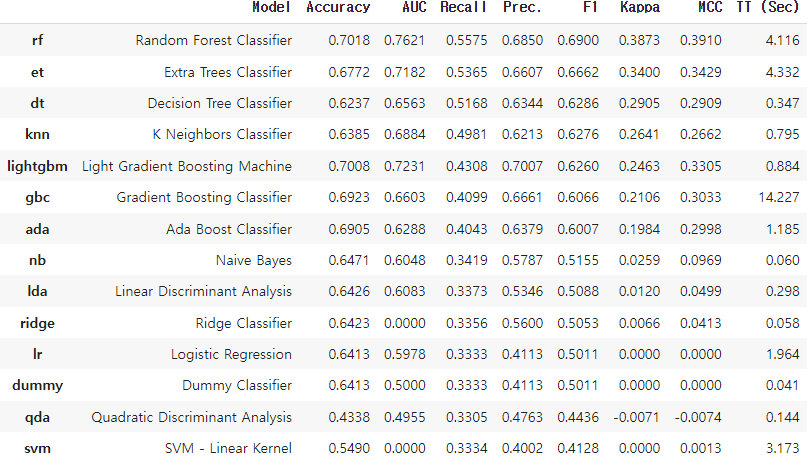
    
    - rf,et 등이 최적의 모델로 판단. lightGBM도 사용하면 좋을 것 같다.
    - GBC는 시간이 너무 오래걸린다.
    - 일단 상위 5개 모델을 앙상블
    - 결과
      - 0.7152515627
      - 0.7028913338	

- [1220_1]

  1) AutoML을 이용하여 최적의 모델 확인
    - RF, LightGBM을 단독으로 튜닝 후 활용
    - 단일 모델 튜닝후 활용시 성능이 오히려 떨어진다.
    - RF, ET로 실행했을때 성능이 확연하게 떨어지는 모습을 볼 수 있다.
  2) 타겟 데이터 불균형 문제 어떻게 해결?
    - SMOTE 방식을 활용
    - AutooML에 자동적으로 SMOTE 방식을 활용할 수 있게 해준다.

- [1221]
  1) "Id"열 새로 생성
    - 중복 데이터 해결을 위해

  2) 클러스터링을 통한 열 새로 생성
    - 유의미한 변수가 너무 적다고 판단하여 추가

  3) CatBoost, LGBM등의 모델에서 좋은 성능이 보이는 것으로 판단된다.
    - RF, ET에서는 과적합.

- [1221_1]
  1) Accuracy 기준으로 평가지표를 변경하여 진행
  
  2) 상위 3개의 모델을 활용 -> 다른 모델들 개별의 성능이 별로 좋지 않다...